In [41]:
import os

import matplotlib.pyplot as plt
import numpy as np

from pandas import read_csv
from pandas import concat
from pandas import DataFrame
from keras.layers import Input
from numpy import array
from keras.models import Model
from keras.layers import Dense
from keras.layers.merge import concatenate
from keras.models import Sequential
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.layers import LSTM
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from keras.models import load_model
from scipy import stats
import csv as csv

import copy

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
fileName = 'Work_with_Ambuj.csv'
modelbestName = "mlp_1a_best_result"
data = read_csv(fileName)
dataAvg = [503.62859]
dataStd = [100.4557059]

nDiff = 0


In [42]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import ConvLSTM2D
 
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from numpy import array
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling1D

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
data.set_index('Date', inplace = True)
data.index = pd.to_datetime(data.index)
data = (data-data.mean())/data.std()

In [45]:
data = data.as_matrix()

In [46]:
import numpy

In [47]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
# find the end of this pattern
        end_ix = i + n_steps
# check if we are beyond the dataset
        if end_ix > len(sequences):
            break
# gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [48]:
n_steps = 3
# convert into input/output
X, y = split_sequences(data, n_steps)
print(X.shape, y.shape)

(1563, 3, 20) (1563,)


In [49]:
x_train = X[:1304]
y_train = y[:1304]
x_test = X[1304:]
y_test = y[1304:]

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1304, 3, 20)
(1304,)
(259, 3, 20)
(259,)


In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1304, 3, 20)
(1304,)
(259, 3, 20)
(259,)


In [52]:
import numpy

In [53]:

def train(x_train,y_train, config):
        inputShape, numNode, numEpoch, batchSize = config
        #if nDiff > 0:
          #      trainingData = np.array(difference(trainingData))
        #trainX, trainY = trainingData[:, :-1], trainingData[:, -1]
        #trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], 1))
        n_features = x_train.shape[2]
        model = Sequential()

        model.add(Conv1D(filters=128, kernel_size=3, activation='tanh',padding = 'same', input_shape=(n_steps,n_features)))
        model.add(Dropout(0.3))
        model.add(MaxPooling1D(pool_size=2,padding = 'same'))
        model.add(Flatten())
        model.add(Dense(16, activation = 'tanh'))

        model.add(Dense(1,activation = 'tanh'))
        model.compile(optimizer='adam', loss= 'mse')


    
        history = model.fit(x_train, y_train, epochs = numEpoch, batch_size = batchSize, verbose = 0, shuffle = False)
        # summarize history for loss
        #plt.plot(history.history['loss'])
        #plt.plot(history.history['val_loss'])
        #plt.title('model loss')
        #plt.ylabel('loss')
        #plt.xlabel('epoch')
        #plt.legend(['train', 'test'], loc='upper left')
        #plt.show()
        #plt.close()
        #plt.savefig(modelName + "ind")
        #plot_model(model, to_file=modelName+'_.png', show_shapes=True, show_layer_names=True)  
        #print("training loss:" , np.mean(np.array(history.history['loss'])))
        #print("Validation loss:" , np.mean(np.array(history.history['val_loss'])))
        return model,np.mean(np.array(history.history['loss']))

config = [60,64,256,5]
# inputShape, numNode, numEpoch, batchSize = config
m,v = train(x_train,y_train, config)
print(v)

In [54]:
def predict(model, testX):
        #testX = np.array(testX).reshape((1, inputShape))
        predictions = model.predict(testX, verbose = 0)
        return array(predictions).reshape(len(predictions),)

p = predict(m,x_test)
q = predict(m,x_train)
print(p.shape)
print(q.shape)

In [55]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

def train_measureRmse(actual, predicted, dataAvg, dataStd,found,cnt):
         
        actual = np.array(actual)*dataStd + dataAvg
        predicted = np.array(predicted)*dataStd + dataAvg
        #print(predicted[0],actual[1])
        #np.savetxt(modelName + "predicted_" + columnName, predicted)
        #np.savetxt("actual_" + columnName, actual)
        actualAvg10 = list()
        predictedAvg10 = list()
        for i in range(0, actual.shape[0], 7):
                actualAvg10.append(np.sum(actual[i:i+7]))
       	        predictedAvg10.append(np.sum(predicted[i:i+7]))
        actualAvg10 = np.array(actualAvg10)
        actualAvg10 = actualAvg10.reshape(len(actualAvg10),)
        predictedAvg10 = np.array(predictedAvg10)
        predictedAvg10 = predictedAvg10.reshape(len(predictedAvg10),)
        actual = actual.reshape(len(actual),)
        predicted = predicted.reshape(len(predicted),)
        #train = pd.DataFrame({"Actual":actualAvg10,"Pred":predictedAvg10})
        w_train = pd.DataFrame({'y_train': actualAvg10, 'y_train_pred': predictedAvg10})
        d_train = pd.DataFrame({'y_train': actual, 'y_train_pred': predicted})
        #test.to_csv("test"+str(cnt)+str(rmse)".csv")
        
        #plt.plot(np.array(actualAvg10))
        #plt.plot(np.array(predictedAvg10))
        #plt.show()
        rmse=np.sqrt(mean_squared_error(np.array(actualAvg10), np.array(predictedAvg10)))
      
        r_squared=rsquared(np.array(actualAvg10),np.array(predictedAvg10))
        
        
        
        
        if found==1:
            w_train.to_csv("C:/Users/user/try/weekly_train_"+str(cnt)+"_"+str(rmse)+".csv")
            d_train.to_csv("C:/Users/user/try/daily_train_"+str(cnt)+"_"+str(rmse)+".csv")
            #np.savetxt("C:/Users/user/try/train_"+str(cnt)+"_"+str(rmse)+".csv", predictions)
        #print("RMSE and 1-rsquared", rmse,1-r_squared)
        #cnt = cnt+1
        return rmse,r_squared
        #r_squared=rsquared(actual.reshape(actual.shape[0]), predicted.reshape(predicted.shape[0]))
        #return rmse
       
def test_measureRmse(actual, predicted, dataAvg, dataStd,found,cnt):
        
        actual = np.array(actual)*dataStd + dataAvg
        predicted = np.array(predicted)*dataStd + dataAvg
        #print(predicted[0],actual[1])
        #np.savetxt(modelName + "predicted_" + columnName, predicted)
        #np.savetxt("actual_" + columnName, actual)
        actualAvg10 = list()
        predictedAvg10 = list()
        for i in range(0, actual.shape[0], 7):
                actualAvg10.append(np.sum(actual[i:i+7]))
       	        predictedAvg10.append(np.sum(predicted[i:i+7]))
        actualAvg10 = np.array(actualAvg10)
        actualAvg10 = actualAvg10.reshape(len(actualAvg10),)
        predictedAvg10 = np.array(predictedAvg10)
        predictedAvg10 = predictedAvg10.reshape(len(predictedAvg10),)
        w_test = pd.DataFrame({'y_test': actualAvg10, 'y_test_pred': predictedAvg10})
        actual = actual.reshape(len(actual),)
        predicted = predicted.reshape(len(predicted),)
        d_test = pd.DataFrame({'y_test': actual, 'y_test_pred': predicted})
        #test.to_csv("test"+str(cnt)+".csv")
        #plt.plot(np.array(actualAvg10))
        #plt.plot(np.array(predictedAvg10))
        #plt.show()
        rmse=np.sqrt(mean_squared_error(np.array(actualAvg10), np.array(predictedAvg10)))
      
        r_squared=rsquared(np.array(actualAvg10),np.array(predictedAvg10))
        if found==1:
            w_test.to_csv("C:/Users/user/try/weekly_test_"+str(cnt)+"_"+str(rmse)+".csv")
            d_test.to_csv("C:/Users/user/try/daily_test_"+str(cnt)+"_"+str(rmse)+".csv")
        #print("RMSE and 1-rsquared", rmse,1-r_squared)
        return rmse,r_squared
        #r_squared=rsquared(actual.reshape(actual.sh

rmse,r = test_measureRmse(y_test, p, 503, 100,1,99)
print(rmse,r)
rmse,r = train_measureRmse(y_train, q, 503, 100,1,99)
print(rmse,r)

In [56]:
def executeModel(x_train,y_train,x_test,y_test, config,found):
    f=open("C:/Users/user/try/result_1final.csv",'a')
    writer=csv.writer(f)
    
    bestError=400
    for j in range(30):
        model,train_loss = train(x_train,y_train, config)
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)
        test_error,test_rsq = test_measureRmse(y_test, test_pred, dataAvg[0], dataStd[0],found,j)
        tr_error,tr_rsq = train_measureRmse(y_train, train_pred, dataAvg[0], dataStd[0],found,j)
        
        
        modelName="Model_1a_"+str(j)+"_"+str(test_error)
        model.save("C:/Users/user/try/"+ modelName+".h5")
        writer.writerow([modelName,tr_error,tr_rsq,test_error,test_rsq])
        
        if test_error < bestError:
            bestError = test_error
            bestmodelName="best_model"
            model.save("C:/Users/user/try/"+ bestmodelName+".h5")
    return bestError

In [57]:
config = [60,128 , 128, 20]
#inputShape, numNode, numEpoch, batchSize = config
found = 1
print(executeModel(x_train,y_train,x_test,y_test, config,found))

#inputShape, numNode, numEpoch, batchSize = config


329.820238159


In [58]:
model = load_model("C:/Users/user/try/best_model.h5")

found=1

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
test_error,test_rsq = test_measureRmse(y_test, test_pred, dataAvg[0], dataStd[0],found,100)
tr_error,tr_rsq = train_measureRmse(y_train, train_pred, dataAvg[0], dataStd[0],found,100)


In [59]:
print(test_error,test_rsq,tr_error,tr_rsq)

329.820238159 0.021153784361 167.945978898 0.744394162288


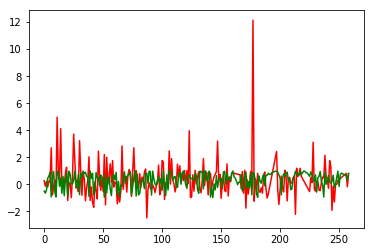

In [60]:
plt.plot(y_test,c='r')
plt.plot(test_pred,c='g') 
plt.show()